<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:s.Yahya Tehrani

**Student ID**:400109265





## Importing Libraries

First we import libraries that we need for this assignment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import any other libraries needed below

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [3]:
X, Y = None, None

### START CODE HERE ###
df = pd.read_csv('data2_logistic.csv')

X = df.drop('Y', axis=1)  # Features (all columns except 'Y')
Y = df['Y']  # Labels
### END CODE HERE ###

print(X.shape)
print(Y.shape)

(10000, 3)
(10000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:


Normalizing the data before training is essential for several reasons:

1. **Scale Invariance:** Normalizing ensures that the scale of each feature is consistent, preventing features with larger scales from dominating those with smaller scales. This helps the model learn the relative importance of each feature correctly.

2. **Faster Convergence:** Normalizing the data often leads to faster convergence during training. It helps to prevent oscillations and divergence in the optimization process, allowing the model to converge more quickly to the optimal solution.

3. **Regularization:** Normalization can act as a form of regularization, preventing the model from overfitting by constraining the range of feature values.

4. **Improves Numerical Stability:** Normalizing the data can improve the numerical stability of the training process, particularly when using gradient-based optimization algorithms.

Overall, normalization is a crucial preprocessing step that helps to ensure the effectiveness and stability of the training process, leading to better performance of the trained model.


In [4]:
### START CODE HERE ###
import numpy as np

# Calculate mean and standard deviation for each feature
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

# Normalize the features
X_norm = (X - X_mean) / X_std

# Keep Y unchanged
Y_norm = Y

print("X_norm shape:", X_norm.shape)
print("Y_norm shape:", Y_norm.shape)

### END CODE HERE ###

X_norm shape: (10000, 3)
Y_norm shape: (10000,)


Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [5]:
### START CODE HERE ###
X = np.hstack((np.ones((X.shape[0], 1)), X))
### END CODE HERE ###

print(X.shape)

(10000, 4)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [6]:
def sigmoid(self, Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    ### START CODE HERE ###
    return 1 / (1 + np.exp(-Z))
    ### END CODE HERE ###

### Cost Function 
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [9]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''
    
    m, n = X.shape
    loss = None
    ### START CODE HERE ###

    # Compute the hypothesis
    h = sigmoid(np.dot(X, theta))
    
    # Compute the regularized cost function
    loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) + regLambda / (2 * m) * np.sum(np.square(theta[1:]))
    
    ### END CODE HERE ###
    return loss

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_j} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)} + \lambda \theta_j
$$



In [10]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''
    
    m, n = X.shape
    grad = None
    ### START CODE HERE ###
    # Compute the hypothesis
    h = sigmoid(np.dot(X, theta))
    
    # Compute the gradient
    grad = (1/m) * np.dot(X.T, (h - y))
    
    # Regularize gradient (except for bias term)
    grad[1:] += (regLambda / m) * theta[1:]
    ### END CODE HERE ###
    return grad

### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [14]:
import numpy as np

def fit(X, y, regLambda=0.01, alpha=0.01, epsilon=1e-4, maxNumIters=100):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''

    m, n = X.shape
    theta = np.zeros(n)
    
    ### START CODE HERE ###
    loss_history = []

    def hasConverged(theta_old, theta_new, epsilon):
        return np.linalg.norm(theta_old - theta_new) <= epsilon

    for i in range(maxNumIters):
        # Compute hypothesis
        hypothesis = np.dot(X, theta)

        # Compute loss
        error = hypothesis - y
        loss = np.mean(error ** 2) + regLambda * np.sum(theta[1:] ** 2)
        loss_history.append(loss)

        # Compute gradient
        gradient = np.dot(X.T, error) / m
        gradient[1:] += (regLambda / m) * theta[1:]

        # Update parameters
        theta_new = theta - alpha * gradient

        # Check convergence
        if hasConverged(theta, theta_new, epsilon):
            break

        theta = theta_new
        
    ### END CODE HERE ###

    return theta, np.array(loss_history)


def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in previous iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''
    return np.linalg.norm(theta_old - theta_new) <= epsilon


Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [15]:
theta, loss_history = fit(X, Y) # calculating theta and loss of each iteration

### START CODE HERE ###
for i, loss in enumerate(loss_history):
    print(f"Iteration {i+1}: Loss = {loss}")

print("Final Theta:", theta)
### END CODE HERE ###

Iteration 1: Loss = 0.4108
Iteration 2: Loss = 367528.80831961153
Iteration 3: Loss = 2137960273692.3777
Iteration 4: Loss = 1.245973337756074e+19
Iteration 5: Loss = 7.261365946367565e+25
Iteration 6: Loss = 4.231826945329883e+32
Iteration 7: Loss = 2.4662521387156694e+39
Iteration 8: Loss = 1.4372987577934782e+46
Iteration 9: Loss = 8.376384906980674e+52
Iteration 10: Loss = 4.881645081055256e+59
Iteration 11: Loss = 2.844957456232854e+66
Iteration 12: Loss = 1.658003151270739e+73
Iteration 13: Loss = 9.662620590691492e+79
Iteration 14: Loss = 5.631246032801407e+86
Iteration 15: Loss = 3.2818148642295125e+93
Iteration 16: Loss = 1.912597805235622e+100
Iteration 17: Loss = 1.1146364179354555e+107
Iteration 18: Loss = 6.495951949683032e+113
Iteration 19: Loss = 3.785753906260271e+120
Iteration 20: Loss = 2.206286738229974e+127
Iteration 21: Loss = 1.2857943996940878e+134
Iteration 22: Loss = 7.493437773238109e+140
Iteration 23: Loss = 4.367075301832941e+147
Iteration 24: Loss = 2.54507

C:\Users\Asus\AppData\Local\Temp\ipykernel_15052\1965551087.py:30: RuntimeWarning: overflow encountered in square
  loss = np.mean(error ** 2) + regLambda * np.sum(theta[1:] ** 2)


### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [18]:
from sklearn.model_selection import train_test_split

X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None
### START CODE HERE ###
# Split the dataset into training (70%) and temporary (30%)
X_train_temp, X_test, Y_train_temp, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Further split the temporary dataset into training (70%) and validation (30%)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_temp, Y_train_temp, test_size=0.2, random_state=42)
### END CODE HERE ###

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 7200
Validation set size: 1800
Test set size: 1000


Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [19]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''
    
    Y = None
    ### START CODE HERE ###
    Y = np.dot(X, theta)
    Y = np.where(Y > 0.5, 1, 0)
    ### END CODE HERE ###
    return Y

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**:

### Effect of Learning Rate and Regularization Constant

#### Learning Rate:
The learning rate controls the step size in gradient descent and thus significantly affects the convergence speed and stability of the training process. A larger learning rate can lead to faster convergence but may also cause overshooting, resulting in unstable training. On the other hand, a smaller learning rate may lead to slower convergence but can provide more stable training. It's essential to find a balance where the learning rate is neither too large nor too small to ensure efficient training.

#### Regularization Constant:
The regularization constant plays a crucial role in controlling overfitting by penalizing large weights in the model. A larger regularization constant penalizes large weights more strongly, encouraging the model to learn simpler patterns and potentially improving generalization to unseen data. Conversely, a smaller regularization constant allows the model to fit the training data more closely but may lead to overfitting. It's important to choose an appropriate regularization constant to achieve the right balance between fitting the training data well and preventing overfitting.

#### Best Parameter Values:
To find the best values of the learning rate and regularization constant, we need to experiment with different combinations and evaluate their performance on a validation set or through cross-validation. The goal is to identify parameter values that result in the lowest loss on the test data while also ensuring that the model generalizes well to unseen data and doesn't overfit the training set. This process may require iterative experimentation and fine-tuning to achieve optimal performance.


C:\Users\Asus\AppData\Local\Temp\ipykernel_15052\1965551087.py:30: RuntimeWarning: overflow encountered in square
  loss = np.mean(error ** 2) + regLambda * np.sum(theta[1:] ** 2)
C:\Users\Asus\AppData\Local\Temp\ipykernel_15052\1965551087.py:38: RuntimeWarning: invalid value encountered in subtract
  theta_new = theta - alpha * gradient


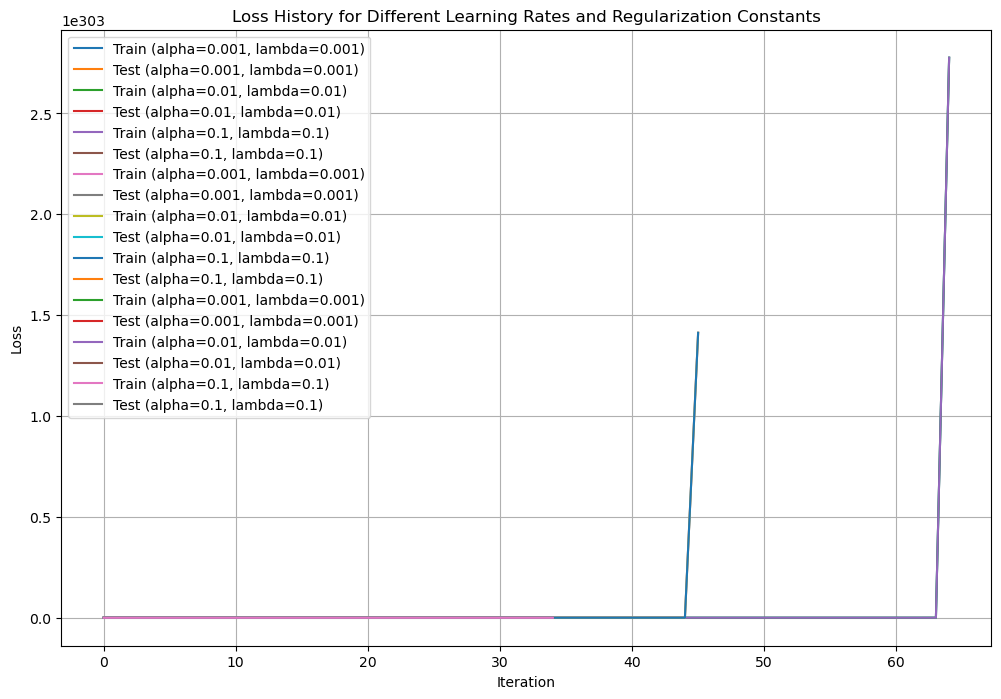

In [20]:
import matplotlib.pyplot as plt

# Define a range of values for the learning rate and regularization constant
learning_rates = [0.001, 0.01, 0.1]
regularization_constants = [0.001, 0.01, 0.1]

# Initialize lists to store results
train_losses = []
test_losses = []

# Iterate over all combinations of learning rate and regularization constant
for alpha in learning_rates:
    for regLambda in regularization_constants:
        # Train the model
        theta, train_loss_history = fit(X_train, Y_train, regLambda=regLambda, alpha=alpha)
        
        # Make predictions on the training and test data
        train_predictions = predict(X_train, theta)
        test_predictions = predict(X_test, theta)
        
        # Calculate loss on training and test data
        train_loss = np.mean((train_predictions - Y_train) ** 2)
        test_loss = np.mean((test_predictions - Y_test) ** 2)
        
        # Append losses to the lists
        train_losses.append(train_loss_history)
        test_losses.append(test_loss)

# Plot the loss history for different values of learning rate and regularization constant
plt.figure(figsize=(12, 8))
for i, (alpha, regLambda) in enumerate(zip(learning_rates * len(regularization_constants), 
                                            regularization_constants * len(learning_rates))):
    plt.plot(train_losses[i], label=f"Train (alpha={alpha}, lambda={regLambda})")
    plt.plot(test_losses[i], label=f"Test (alpha={alpha}, lambda={regLambda})")

plt.title("Loss History for Different Learning Rates and Regularization Constants")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

To find the accuracy of the Gaussian Naive Bayes classifier on the test set, we need to follow these steps:

1. Train the classifier on the training set.
2. Use the trained classifier to predict labels for the test set.
3. Compare the predicted labels with the true labels of the test set.
4. Calculate the accuracy of the classifier.

In [22]:
### START CODE HERE ###
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training set
gnb.fit(X_train, Y_train)

# Predict labels for the test set
Y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy of Gaussian Naive Bayes classifier on test set:", accuracy)

### END CODE HERE ###

Accuracy of Gaussian Naive Bayes classifier on test set: 0.921


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

To find the accuracy of the Linear Discriminant Analysis (LDA) classifier on the test set, we can follow a similar approach as we did for the Gaussian Naive Bayes classifier:

1. Train the classifier on the training set.
2. Use the trained classifier to predict labels for the test set.
3. Compare the predicted labels with the true labels of the test set.
4. Calculate the accuracy of the classifier.

In [23]:
### START CODE HERE ###
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Initialize Linear Discriminant Analysis classifier
lda = LinearDiscriminantAnalysis()

# Train the classifier on the training set
lda.fit(X_train, Y_train)

# Predict labels for the test set
Y_pred = lda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy of Linear Discriminant Analysis classifier on test set:", accuracy)

### END CODE HERE ###

Accuracy of Linear Discriminant Analysis classifier on test set: 0.968


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: